<a href="https://colab.research.google.com/github/subbuba/ComputerVision/blob/master/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Import necessary modules.
import pandas as pd
import numpy as np
import tensorflow
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import BatchNormalization


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
image = cv2.imread('/content/drive/My Drive/subbu/test_image.png')

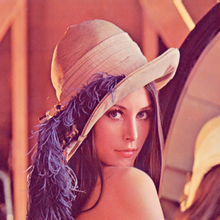

In [10]:
cv2_imshow(image)

In [6]:
data = np.load('/content/drive/My Drive/CV/images.npy')

In [7]:
import os
os.chdir("/content/drive/My Drive/CV")
!ls

cifar_cnn_checkpoint_01_loss1.7573.h5  images.npy  Labels.csv


In [8]:
labels = pd.read_csv('/content/drive/My Drive/CV/Labels.csv')    

In [9]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
labels.size

4750

In [11]:
labels.Label[0]

'Small-flowered Cranesbill'

In [12]:
labels.shape

(4750, 1)

In [13]:
labels['cc']= pd.Categorical(labels.Label)

In [14]:
labels['code'] = labels.cc.cat.codes

In [15]:
labels.head

<bound method NDFrame.head of                           Label                         cc  code
0     Small-flowered Cranesbill  Small-flowered Cranesbill    10
1     Small-flowered Cranesbill  Small-flowered Cranesbill    10
2     Small-flowered Cranesbill  Small-flowered Cranesbill    10
3     Small-flowered Cranesbill  Small-flowered Cranesbill    10
4     Small-flowered Cranesbill  Small-flowered Cranesbill    10
...                         ...                        ...   ...
4745           Loose Silky-bent           Loose Silky-bent     6
4746           Loose Silky-bent           Loose Silky-bent     6
4747           Loose Silky-bent           Loose Silky-bent     6
4748           Loose Silky-bent           Loose Silky-bent     6
4749           Loose Silky-bent           Loose Silky-bent     6

[4750 rows x 3 columns]>

In [16]:
labels['cc']

0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: cc, Length: 4750, dtype: category
Categories (12, object): [Black-grass, Charlock, Cleavers, Common Chickweed, ..., Scentless Mayweed,
                          Shepherds Purse, Small-flowered Cranesbill, Sugar beet]

In [18]:
labels.drop(['cc'], axis = 1)

,Label,code
0,Small-flowered Cranesbill,10
1,Small-flowered Cranesbill,10
2,Small-flowered Cranesbill,10
3,Small-flowered Cranesbill,10
4,Small-flowered Cranesbill,10
...,...,...
4745,Loose Silky-bent,6
4746,Loose Silky-bent,6
4747,Loose Silky-bent,6
4748,Loose Silky-bent,6


In [19]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Label   4750 non-null   object  
 1   cc      4750 non-null   category
 2   code    4750 non-null   int8    
dtypes: category(1), int8(1), object(1)
memory usage: 46.9+ KB


In [38]:
labels['code'].unique()

array([10,  5,  9,  4,  3,  1,  2,  8, 11,  7,  0,  6], dtype=int8)

In [20]:
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [21]:
data.shape

(4750, 128, 128, 3)

In [22]:
data[1]

array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

In [23]:
x = data.shape[0]

In [24]:
x

4750

Label 
 Label ID: 0 
 Name: Small-flowered Cranesbill


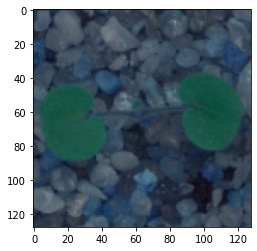

In [27]:
i = 0
image = data[i]
#label = labels[i][0]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[0]}')
plt.imshow(image)

Label 
 Label ID: 4700 
 Name: Loose Silky-bent


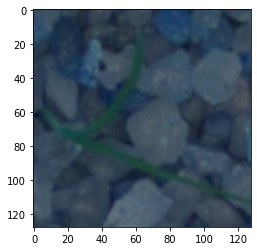

In [28]:
i = 4700
image = data[i]
#label = labels[i][0]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[i]}')
plt.imshow(image)

Label 
 Label ID: 1000 
 Name: Shepherds Purse


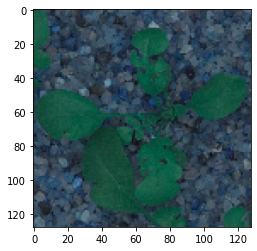

In [26]:
i = 1000
image = data[i]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[i]}')
plt.imshow(image)

#### Data Pre-processing:
####      a. Normalization.
####      b. Gaussian Blurring.
####      c. Visualize data after pre-processing

Reshapethe data

In [29]:
data1 = data.reshape(data.shape[0], 128, 128, 3)

In [30]:
data1.shape[0]

4750

Normalization

In [31]:
data1 = data1.astype('float32')
data1 /= 255

In [32]:
data1

array([[[[0.13725491, 0.20392157, 0.30588236],
         [0.14117648, 0.19215687, 0.29803923],
         [0.12156863, 0.1764706 , 0.27058825],
         ...,
         [0.30588236, 0.37254903, 0.44705883],
         [0.29803923, 0.3647059 , 0.43137255],
         [0.3137255 , 0.37254903, 0.42745098]],

        [[0.12941177, 0.18039216, 0.26666668],
         [0.14509805, 0.19607843, 0.28627452],
         [0.1882353 , 0.25490198, 0.3254902 ],
         ...,
         [0.31764707, 0.3764706 , 0.44313726],
         [0.2901961 , 0.34901962, 0.4117647 ],
         [0.3254902 , 0.37254903, 0.42745098]],

        [[0.13333334, 0.19607843, 0.26666668],
         [0.13725491, 0.20392157, 0.28235295],
         [0.27450982, 0.33333334, 0.39607844],
         ...,
         [0.3254902 , 0.38039216, 0.4392157 ],
         [0.30980393, 0.36862746, 0.42352942],
         [0.30980393, 0.36862746, 0.41960785]],

        ...,

        [[0.13725491, 0.19607843, 0.27058825],
         [0.16470589, 0.22352941, 0.28627452]

In [33]:
print(len(data1)) # Check the number of rows in the dataset.
print(data1.shape) 

4750
(4750, 128, 128, 3)


In [34]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128,3)) 

In [35]:
# Now we apply the gaussian blur to each 128x128x3 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(data1):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 3)

In [36]:
new_x.shape

(4750, 128, 128, 3)

Before image

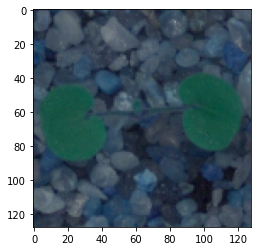

In [37]:
plt.imshow(data1[0]) # , cmap='gray')

After Gaussian blur

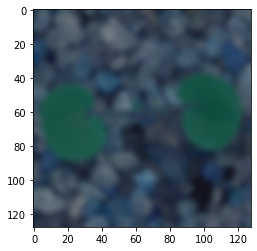

In [38]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[0]) # , cmap='gray')
#plt.title(y[i])

Before image

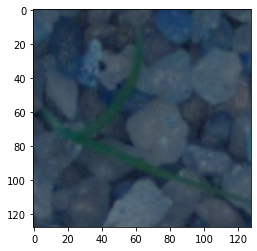

In [39]:
plt.imshow(data1[4700]) #, cmap='gray')

After Gaussian blur

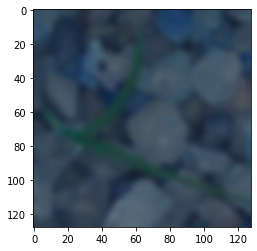

In [40]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[4700]) #, cmap='gray')
#plt.title(y[i])

Before Image

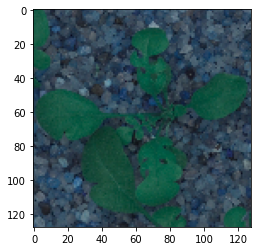

In [41]:
plt.imshow(data1[1000]) #, cmap='gray')

After Gaussian blur

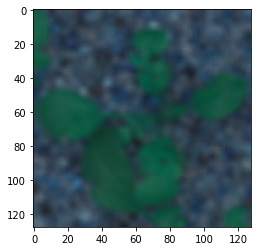

In [42]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[1000]) #, cmap='gray')
#plt.title(y[i])

Make data compatible

In [43]:
y = labels['code']

In [44]:
y = tensorflow.keras.utils.to_categorical(y, 12)

In [45]:
y.shape

(4750, 12)

In [46]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [48]:
i = 0
print(f'Label ID: {i} \n Name: {labels.Label[i]} \n {labels.code[i]}')
print(f'{y[0]}')

Label ID: 0 
 Name: Small-flowered Cranesbill 
 10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [49]:
new_x[0]

array([[[0.16180778, 0.2205134 , 0.30295554],
        [0.17520155, 0.23439276, 0.31427342],
        [0.20624132, 0.26652044, 0.34097916],
        ...,
        [0.30706471, 0.36572433, 0.42713022],
        [0.30839768, 0.36701316, 0.42770886],
        [0.30974805, 0.36832809, 0.42923063]],

       [[0.16085956, 0.22147331, 0.30388999],
        [0.17525931, 0.23588103, 0.31560007],
        [0.20698485, 0.268047  , 0.34230343],
        ...,
        [0.30642068, 0.36490849, 0.42504054],
        [0.3086395 , 0.36690143, 0.42621136],
        [0.30973396, 0.36786079, 0.42742956]],

       [[0.16639587, 0.22991817, 0.3104412 ],
        [0.17979226, 0.24311449, 0.32144639],
        [0.21245687, 0.27527031, 0.34865192],
        ...,
        [0.30528283, 0.36291137, 0.42073292],
        [0.30890542, 0.36617136, 0.42362797],
        [0.3100597 , 0.36705112, 0.42512137]],

       ...,

       [[0.15181634, 0.20993605, 0.27907032],
        [0.15534365, 0.21264833, 0.28100118],
        [0.15842393, 0

In [50]:
X_test, X_train, y_test, y_train = train_test_split(new_x, y, train_size=0.3, random_state=0)

In [51]:
X_train.shape

(3325, 128, 128, 3)

In [52]:
y_train.shape

(3325, 12)

In [53]:
X_test.shape

(1425, 128, 128, 3)

In [54]:
y_test.shape

(1425, 12)

In [55]:
### Furhter split test and validation .5
X_test1, X_validation, y_test1, y_validation = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [56]:
X_test1.shape

(712, 128, 128, 3)

In [57]:
y_test1.shape

(712, 12)

In [58]:
y_test1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [59]:
X_validation.shape

(713, 128, 128, 3)

In [60]:
y_validation.shape

(713, 12)

In [61]:
#### it’s already in compatible shape

In [62]:
X_train.shape[1:]

(128, 128, 3)

Build a model

In [68]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

In [69]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_6 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
activation_7 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 128)      

In [73]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 10)


model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           save_freq=1)
#                                                           period=1)

In [72]:
history = model.fit(X_train,y_train, batch_size = 32, epochs = 25, validation_data=(X_validation,y_validation), shuffle = True,
         callbacks=[early_stopping, model_checkpoint])

Epoch 1/25


KeyError: ignored

In [74]:
history = model.fit(X_train,y_train, batch_size = 32, epochs = 25, validation_data=(X_validation,y_validation), shuffle = True)

Epoch 1/25
104/104 [==============================] - 10s 92ms/step - loss: 2.2633 - accuracy: 0.2168 - val_loss: 1.8262 - val_accuracy: 0.3969
Epoch 2/25
104/104 [==============================] - 9s 82ms/step - loss: 1.6561 - accuracy: 0.4171 - val_loss: 1.4147 - val_accuracy: 0.5470
Epoch 3/25
104/104 [==============================] - 9s 83ms/step - loss: 1.3201 - accuracy: 0.5576 - val_loss: 1.1504 - val_accuracy: 0.6073
Epoch 4/25
104/104 [==============================] - 9s 84ms/step - loss: 1.1245 - accuracy: 0.6262 - val_loss: 1.1466 - val_accuracy: 0.6297
Epoch 5/25
104/104 [==============================] - 9s 84ms/step - loss: 0.9815 - accuracy: 0.6707 - val_loss: 0.9718 - val_accuracy: 0.6928
Epoch 6/25
104/104 [==============================] - 9s 83ms/step - loss: 0.8653 - accuracy: 0.7161 - val_loss: 0.9130 - val_accuracy: 0.6985
Epoch 7/25
104/104 [==============================] - 9s 85ms/step - loss: 0.7665 - accuracy: 0.7435 - val_loss: 0.8914 - val_accuracy: 0.698

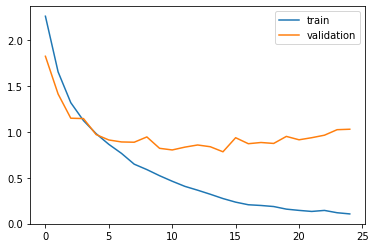

In [75]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [76]:
scores = model.evaluate(X_test1,y_test1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

23/23 [==============================] - 1s 26ms/step - loss: 1.0379 - accuracy: 0.7683
Test Loss: 1.0378800630569458
Test Accuracy: 0.7682584524154663


In [78]:
ypred=  model.predict(X_test1)

In [79]:
y_test2 = np.argmax(y_test1, axis = 1)

In [80]:
y_pred2 = np.argmax(ypred, axis = 1)

In [81]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_pred2, y_test2)
print(cm)

=== Confusion Matrix ===
[[14  0  0  0  6  1 15  0  1  0  0  0]
 [ 0 50  0  0  0  0  0  1  0  0  0  3]
 [ 0  4 35  0  0  2  0  1  1  1  1  2]
 [ 0  0  1 82  1  3  0  3  4  3  0  0]
 [ 3  0  0  1 16  1  3  0  1  0  0  0]
 [ 2  0  0  0  3 62  2  1  1  1  1  4]
 [25  0  0  0  2  8 81  0  0  0  0  0]
 [ 0  0  0  1  1  0  0 23  2  0  0  0]
 [ 0  0  5  4  0  1  1  3 66  8  0  8]
 [ 0  0  0  0  0  0  0  1  1  8  1  0]
 [ 0  3  0  0  0  0  0  1  0  2 67  6]
 [ 0  1  0  0  1  0  0  0  0  1  0 43]]


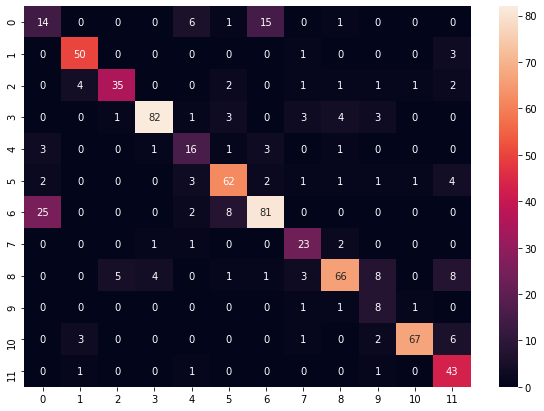

In [82]:
sequence = [0,1,2,3,4,5,6,7,8,9,10,11]
df_cm = pd.DataFrame(cm, index = [i for i in sequence],
                     columns = [i for i in sequence])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].¶

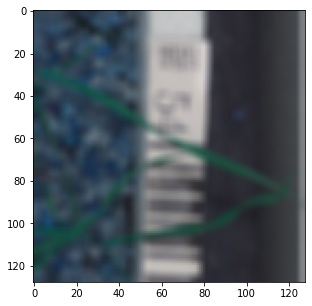

Predicted Label 6
True Label 0


In [89]:
plt.figure(figsize=(5,5))
plt.imshow(X_test1[2]) #,cmap="gray")
plt.show()
print('Predicted Label', y_pred2[2])
print('True Label', np.argmax(y_test2[2]))

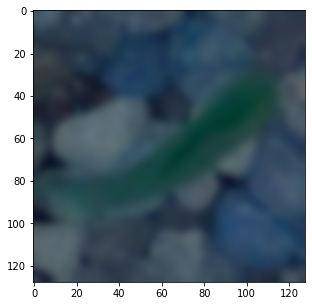

Predicted Label 5
True Label 0


In [90]:
plt.figure(figsize=(5,5))
plt.imshow(X_test1[3]) #,cmap="gray")
plt.show()
print('Predicted Label', y_pred2[3])
print('True Label', np.argmax(y_test2[3]))

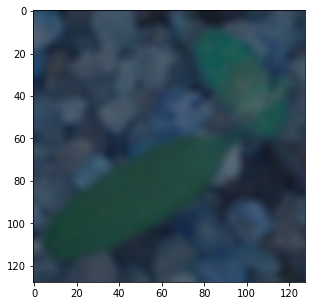

Predicted Label 2
True Label 0


In [91]:
plt.figure(figsize=(5,5))
plt.imshow(X_test1[33]) #,cmap="gray")
plt.show()
print('Predicted Label', y_pred2[33])
print('True Label', np.argmax(y_test2[33]))

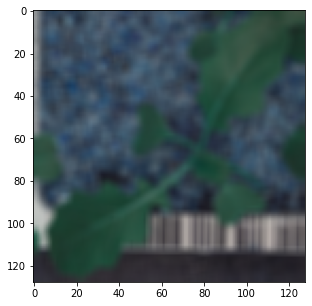

Predicted Label 11
True Label 0


In [92]:
plt.figure(figsize=(5,5))
plt.imshow(X_test1[59]) #,cmap="gray")
plt.show()
print('Predicted Label', y_pred2[59])
print('True Label', np.argmax(y_test2[59]))